<a href="https://colab.research.google.com/github/plee0617/IS-170-Binder/blob/Principal-Component-Analysis/Lee%26NgLAB6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#breast cancer data comes with the sklearn library
from sklearn.datasets import load_breast_cancer

In [ ]:
#load_breast_cancer gives both labels and the data. Let's fetch the data.
breast=load_breast_cancer()
breast_data=breast.data

In [ ]:
#check the shape of the data
breast_data.shape

(569, 30)

In [ ]:
#rename
breast_labels=breast.target

In [ ]:
#Let's concatenate the data and labels together for a Dataframe (CSV format)
import numpy as np
labels = np.reshape(breast_labels, (569,1))
final_breast_data=np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [ ]:
#final_breast_data changes to dataframe
import pandas as pd
breast_dataset = pd.DataFrame(final_breast_data)

In [ ]:
#let's check the features
features=breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
#label is missing, so add it here
features_labels=np.append(features,'label')
#add the column names to the dataframe
breast_dataset.columns=features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


Data Normalization & Visualization

In [ ]:
#Before we do the data visualization, we'll normalize the data.
#The data normalization is a common practice 
#StandardScaler is the normalizing function.
#After the normalization, we'll do fit_transform on the data.
from sklearn.preprocessing import StandardScaler
x=breast_dataset.loc[:,features].values
x=StandardScaler().fit_transform(x) 

In [ ]:
x.shape

(569, 30)

In [ ]:
#normalized data has a mean of zero and a standard deviation of one
np.mean(x), np.std(x)

(-6.118909323768877e-16, 1.0)

In [ ]:
#converting the normalized features into a dataframe form
feat_cols=['feature'+str(i) for i in range(x.shape[1])]
normalized_breast=pd.DataFrame(x,columns=feat_cols)
normalized_breast.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
#For the PCA, we'll try components 2
from sklearn.decomposition import PCA
pca_breast=PCA(n_components=2)
principalComponents_breast=pca_breast.fit_transform(x)

In [ ]:
principal_breast_DF=pd.DataFrame(data=principalComponents_breast, columns=['principal component1', 'principal component2'])

In [ ]:
principal_breast_DF.head()

,principal component1,principal component2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


Once you have the principal components, you can find the explained_variance_ratio. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [ ]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


The results above tells us that the principal component 1 holds 44.2% of the information and the principal component 2 holds 19%. 

<Figure size 432x288 with 0 Axes>

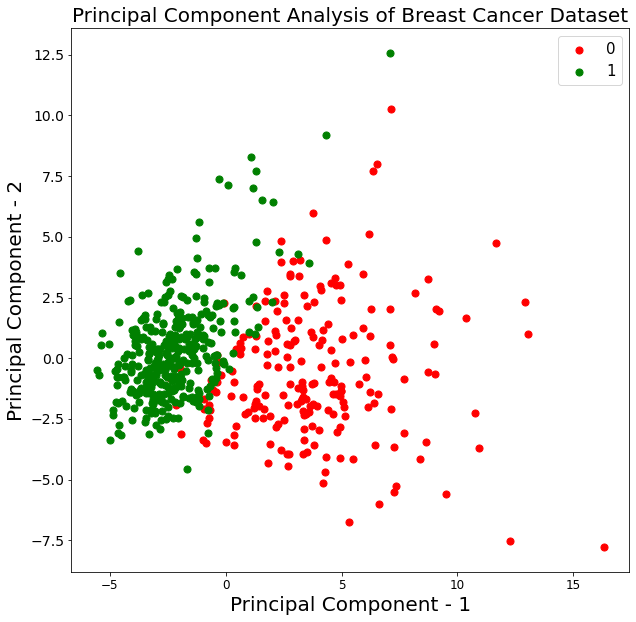

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_DF.loc[indicesToKeep, 'principal component1']
               , principal_breast_DF.loc[indicesToKeep, 'principal component2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

Note about the component number: the question of what determines the component numnber is bit unclear as this is a unsupervised algorithm (data mining). (This breast cancer data is clearly labeled with benigh and malignant). There are several approaches to in acquiring the number - the scree test, eigenvalues over 1, the skew test, etc.... The "trial and error" will be your best bet in determining what works best. 

Note: 0 is benigh and 1 is malignant.

Iris Dataset

In [ ]:
#Import

from sklearn.datasets import load_iris


In [ ]:
#Load data

iris=load_iris()
iris_data=iris.data

In [ ]:
#Count rows and columns

iris_data.shape

(150, 4)

In [ ]:
#rename

iris_labels=iris.target

In [ ]:
#Concatenate data and labels together for Dataframe

import numpy as np 
labels = np.reshape(iris_labels, (150,1))
final_iris_data=np.concatenate([iris_data,labels],axis=1)
final_iris_data.shape

(150, 5)

In [ ]:
#Data changes to Dataframe

import pandas as pd
iris_dataset = pd.DataFrame(final_iris_data)

In [ ]:
#Check for features

features=iris.feature_names
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
#label is missing, adding label
features_labels=np.append(features,'label')

#add column names to the dataframe
iris_dataset.columns=features_labels
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
#Show last 5 rows

iris_dataset.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


Data Normalization & Visualization

In [ ]:
#Before we do the data visualization, we'll normalize the data.
#The data normalization is a common practice 
#StandardScaler is the normalizing function.
#After the normalization, we'll do fit_transform on the data.

from sklearn.preprocessing import StandardScaler
x=iris_dataset.loc[:,features].values
x=StandardScaler().fit_transform(x) 

In [ ]:
x.shape

(150, 4)

In [ ]:
#Normalized data has a mean of 0 and a standard deviation of 1

np.mean(x), np.std(x)

(-1.4684549872375404e-15, 1.0)

In [ ]:
#Converting normalized features into a dataframe form

feat_cols=['feature'+str(i) for i in range(x.shape[1])]
normalized_iris=pd.DataFrame(x,columns=feat_cols)
normalized_iris.head()

,feature0,feature1,feature2,feature3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
#PCA, components = 2

from sklearn.decomposition import PCA
pca_iris=PCA(n_components=2)
principalComponents_iris=pca_iris.fit_transform(x)


In [ ]:
#Naming columns 
principal_iris_DF=pd.DataFrame(data=principalComponents_iris, columns=['principal component1', 'principal component2'])

In [ ]:
principal_iris_DF.head()

,principal component1,principal component2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [ ]:
#Show variance
print('Explained variation per principal component: {}'.format(pca_iris.explained_variance_ratio_))

Explained variation per principal component: [0.72962445 0.22850762]


The results above tells us that the principal component 1 holds 72.9% of the information and the principal component 2 holds 23%. 

<Figure size 432x288 with 0 Axes>

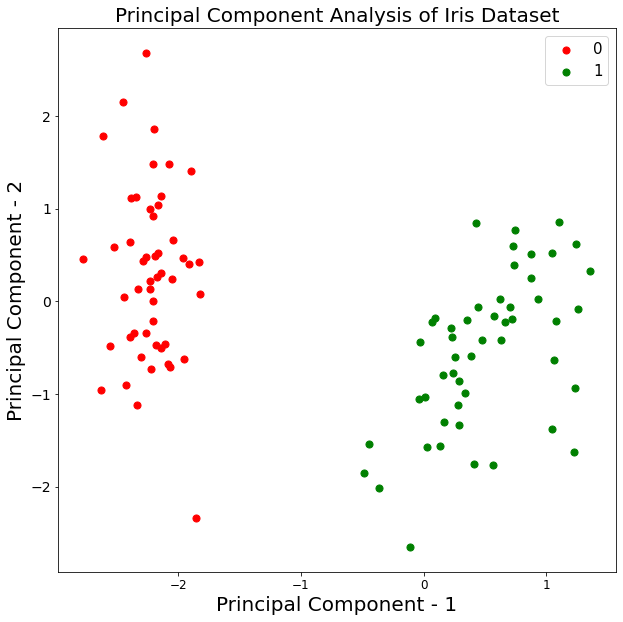

In [ ]:
#Plotting the graph

import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)         #x-axis
plt.ylabel('Principal Component - 2',fontsize=20)         #y-axis
plt.title("Principal Component Analysis of Iris Dataset",fontsize=20)  #title
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = iris_dataset['label'] == target
    plt.scatter(principal_iris_DF.loc[indicesToKeep, 'principal component1']
               , principal_iris_DF.loc[indicesToKeep, 'principal component2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

Wine dataset

In [ ]:
#Import
from sklearn.datasets import load_wine

In [ ]:
#Load data
wine=load_wine()
wine_data=wine.data

In [ ]:
wine_data.shape

(178, 13)

In [ ]:
wine_labels=wine.target

In [ ]:
#Concatenate data and labels together to Dataframe
import numpy as np
labels = np.reshape(wine_labels, (178,1))
final_wine_data=np.concatenate([wine_data,labels],axis=1)
final_wine_data.shape

(178, 14)

In [ ]:
import pandas as pd
wine_dataset = pd.DataFrame(final_wine_data)

In [ ]:
#Checking features
features=wine.feature_names
features

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
#label is missing, so add it here
features_labels=np.append(features,'label')

#add the column names to the dataframe
wine_dataset.columns=features_labels
wine_dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [ ]:
#Show last five rows 
wine_dataset.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2.0


Data Normalization & Visualization

In [ ]:
#Normalize data before doing data visualization

from sklearn.preprocessing import StandardScaler
x=wine_dataset.loc[:,features].values
x=StandardScaler().fit_transform(x)

In [ ]:
x.shape

(178, 13)

In [ ]:
#Mean of 0, Standard Deviation of 1
np.mean(x), np.std(x)

(4.66735072755122e-16, 1.0)

In [ ]:
#Convert normalized features into a dataframe form

feat_cols=['features'+str(i) for i in range(x.shape[1])]
normalized_wine=pd.DataFrame(x,columns=feat_cols)
normalized_wine.head()


,features0,features1,features2,features3,features4,features5,features6,features7,features8,features9,features10,features11,features12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
#PCA, component = 3

from sklearn.decomposition import PCA
pca_wine=PCA(n_components=2)
principalComponents_wine=pca_wine.fit_transform(x)

In [ ]:
#Naming columns
principal_wine_DF=pd.DataFrame(data=principalComponents_wine, columns=['principal component1', 'principal component2'])

In [ ]:
principal_wine_DF.head()

,principal component1,principal component2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


After principal components, find explained variance ratio

In [ ]:
print('Explained variation per principal component: {}'.format(pca_wine.explained_variance_ratio_))

Explained variation per principal component: [0.36198848 0.1920749 ]


Results show the principal component 1 holds 36.2% of the information and the principal component 2 holds 19.2%.

<Figure size 432x288 with 0 Axes>

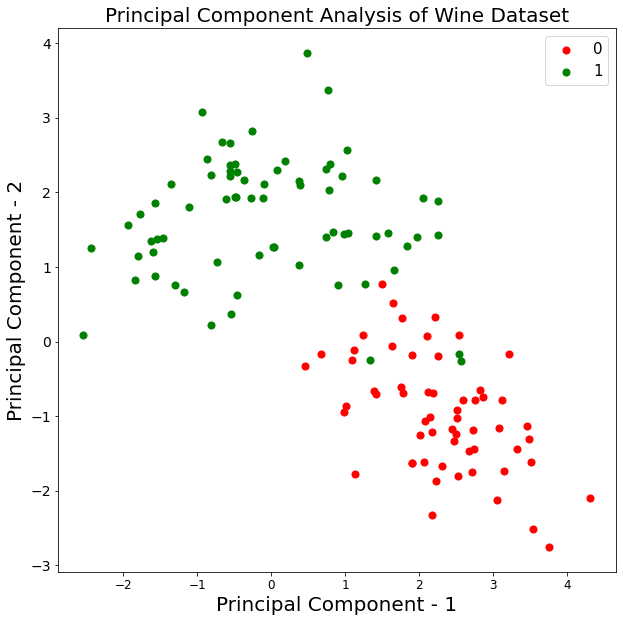

In [ ]:
#Plotting graph
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Wine Dataset",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = wine_dataset['label'] == target
    plt.scatter(principal_wine_DF.loc[indicesToKeep, 'principal component1']
               , principal_wine_DF.loc[indicesToKeep, 'principal component2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})